In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from utils.transform import Transform
from riskfuel_test import riskfuel_test
import torch
from utils.model import PutNet

In [36]:
transform = Transform(use_boxcox=True)

In [37]:
df = pd.read_csv("dataset/training_data.csv")

In [38]:
x = torch.Tensor(transform.transform_x(df[["S", "K", "T", "r", "sigma"]].to_numpy()))
y = df[["value"]].to_numpy().flatten()

In [5]:
mm = PutNet()
# mm.load_state_dict(torch.load("simple-model.pt"))
mm.load_state_dict(torch.load("models/model_1900000_train_42300_epoch_192_neurons_boxcox_scaler.pt"))
mm.eval()  # evaluation mode

PutNet(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
  )
  (out): Linear(in_features=64, out_features=1, bias=True)
)

In [6]:
y_hat = transform.inverse_transform_y(mm(x).detach().cpu().numpy())

In [7]:
max_loss = np.abs(y - y_hat)

<AxesSubplot: ylabel='Count'>

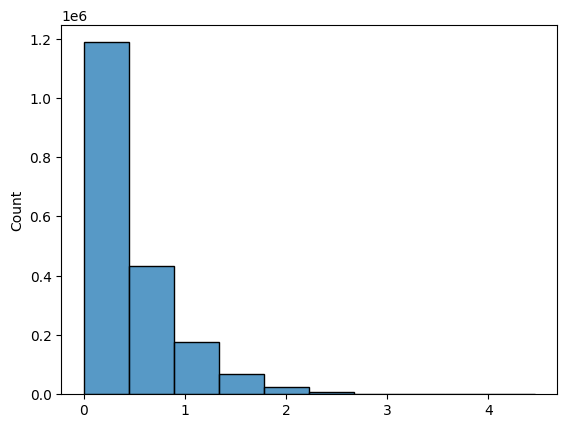

In [8]:
sns.histplot(max_loss, bins=10)

In [30]:
ids = np.argwhere(max_loss >= 4).flatten()
x_new = x[ids].numpy()
# S, K, T, r, sigma
min_vals = []
max_vals = []
for i in range(5):
    min_vals.append(np.min(x_new[:,i]))
    max_vals.append(np.max(x_new[:,i]))

In [31]:
print(min_vals)
print(max_vals)

[0.0, 0.22222222, 0.0, 0.0, 0.11111111]
[0.7777778, 1.0, 1.0, 0.96481466, 0.9982906]


In [10]:
xy_df = pd.DataFrame(xy, columns=["S", "K", "T", "r", "sigma", "value"])
xy_df.to_csv("dataset/training_data_1.csv")